In [1]:
#Question 1 - Data Acquisition


import regex
from bs4 import BeautifulSoup
import requests as r

In [15]:
url = r'https://www.bbc.com/news/technology' #Crawing BBC news of asia

In [16]:
def scrap(url):  
    res = r.get(url) 
    html = res.text #Get html text
    return BeautifulSoup(html) #Indexing html text

In [17]:
bf = scrap(url)

In [18]:
import re
links = []
for link in bf.find_all(href=True):
    #print(link)
    #Valid blog links only starts with '/news/' and ends with a 8-digit number
#     if re.match(r'^/news/.*\d{8}$',link['href']): 
    if re.match(r'^/news/.*$',link['href']): 
        links.append('https://www.bbc.com' + link['href'])
links = set(links) #Remove redundant links
links

{'https://www.bbc.com/news/10628323',
 'https://www.bbc.com/news/10725415',
 'https://www.bbc.com/news/20039682',
 'https://www.bbc.com/news/articles/c3g21x5yp81o',
 'https://www.bbc.com/news/articles/c4n9erzrg93o',
 'https://www.bbc.com/news/articles/c6pdg0j69d2o',
 'https://www.bbc.com/news/av/10462520',
 'https://www.bbc.com/news/business',
 'https://www.bbc.com/news/business-67238386',
 'https://www.bbc.com/news/business-67284936',
 'https://www.bbc.com/news/business-67306635',
 'https://www.bbc.com/news/business-67306737',
 'https://www.bbc.com/news/business-67411535',
 'https://www.bbc.com/news/business-67417987',
 'https://www.bbc.com/news/business-67458603',
 'https://www.bbc.com/news/england/beds_bucks_and_herts',
 'https://www.bbc.com/news/england/birmingham_and_black_country',
 'https://www.bbc.com/news/england/hereford_and_worcester',
 'https://www.bbc.com/news/england/london',
 'https://www.bbc.com/news/england/norfolk',
 'https://www.bbc.com/news/england/shropshire',
 'ht

In [6]:
contents = dict() #Creat a dictionary to hold all news content
for link in list(links)[1:21]: #Use 2ed-21th news links
    bf = scrap(link)
    tag_content = ''
    for tag in bf.find_all('p'):
        tag_content += tag.text
        tag_content += '  '
    contents[link] = tag_content
    

In [7]:
print('Total {} pieces of news'.format(len(contents.items())))
for url,content in contents.items():
    print('------------------------------------------------------------------------------------------')
    print(content)
    print('------------------------------------------------------------------------------------------')

Total 20 pieces of news
------------------------------------------------------------------------------------------
One of Vietnam's best-known climate activists has been sentenced to three years in prison over tax evasion.   Hoang Thi Minh Hong is the fifth Vietnamese activist to be jailed over the charge.   Campaigners say it is part of a state-authorised move to silence criticism of the country's climate policies.  Hoang Thi Minh Hong was convicted on Thursday in Ho Chi Minh City in a trial that lasted just three hours. She was also fined $4,100 (Â£3,380).  Human rights groups say this was a preordained outcome to a politically-driven case. They point out that activists have been treated more severely than other people held on tax evasion charges, being detained and denied access to lawyers.   NGOs in Vietnam have long existed in a legal "grey zone", where there are no specific requirements for them to pay tax on donations from overseas.   Yet the state has interpreted ambiguous laws

In [8]:
#Question 2 - Data Preprocessing
'''

2. Write the pattern that matches a string that has an ‘a’ followed by one or more ‘b’.
- Test cases: bab, abbbbb and baaaa
3. Write the pattern to check whether a string starts and ends with a specific number (in this case 6).
- Test cases: 65117896, 78238936 and 56666665
4. Write the pattern to search the number (0-9) of length between 2-4 in a given string.
- Test cases: Exercises number 1, 23, 345, and 45678 are important
5. Write the pattern to remove leading zeros from an IP address.
- Test cases: 210.08.090.194 and 010.01.010.100
6. Write the pattern to replace whitespaces with an underscore and vice versa.
- Test cases: Python Exercises Of Regular Expression
7. Write the pattern to convert the date of yyyy-mm-dd format to dd-mm-yyyy format.
- Test cases: 2022-09-10
8. Write the pattern to find all words starting with ‘a’ and ‘e’.
- Test cases: The following example creates an ArrayList with a capacity of 50 elements. Four elements are then
added to the ArrayList and the ArrayList is trimmed accordingly.
9. Write the pattern to extract values between quotation marks of a string.
- Test cases: Regex can be used in programming languages such as “Python”, “SQL”, “Javascript”, “R”, “Google
Analytics”, “Google Data Studio”, and throughout the coding process.
10. Write the pattern to find urls in a string.
- Test cases: Find more Examples at Github https://www.github.com or W3School https://www.w3schools.com/.
'''
import re
def search_pattern(pattern,sentence):
    result = re.search(pattern,sentence)
    if result:
        return result.group()
    else:
        return None

In [9]:
#1. Write the pattern to check that a string only contains a certain set of characters (in this case a-zA-Z and 0-9).
#- Test cases: ABCDEFabcdef123450 and ABCD@Fabcdef123450
reg = r'^[A-Za-z0-9]+$'
search_pattern(reg,'ABCDEFabcdef123450'), search_pattern(reg,'ABCD@Fabcdef123450')

('ABCDEFabcdef123450', None)

In [10]:
#2. Write the pattern that matches a string that has an ‘a’ followed by one or more ‘b’.
#- Test cases: bab, abbbbb and baaaa
reg = r'ab+'
search_pattern(reg,'bab'),search_pattern(reg,'abbbbb'),search_pattern(reg,'baaaa')

('ab', 'abbbbb', None)

In [11]:
#3. Write the pattern to check whether a string starts and ends with a specific number (in this case 6).
#- Test cases: 65117896, 78238936 and 56666665
reg = r'^6.*6$'
search_pattern(reg,'65117896'),search_pattern(reg,'78238936'),search_pattern(reg,'56666665')

('65117896', None, None)

In [12]:
#4. Write the pattern to search the number (0-9) of length between 2-4 in a given string.
#- Test cases: Exercises number 1, 23, 345, and 45678 are important
reg = r'[0-9]{2,4}'
search_pattern(reg,'1'),search_pattern(reg,'23'),search_pattern(reg,'345'),search_pattern(reg,'45678')

(None, '23', '345', '4567')

In [13]:
#5. Write the pattern to remove leading zeros from an IP address.
#- Test cases: 210.08.090.194 and 010.01.010.100
reg = r'^0+|(?<=\.)0+' #Catch '0' from head or behind '.'
re.sub(reg, '', '210.08.090.194'),re.sub(reg,'','010.01.010.100') #Remove these '0'

('210.8.90.194', '10.1.10.100')

In [14]:
#6. Write the pattern to replace whitespaces with an underscore and vice versa.
#- Test cases: Python Exercises Of Regular Expression
print(re.sub(r'\s',r'_','Python Exercises Of Regular Expression'))
print(re.sub(r'_',' ','Python_Exercises_Of_Regular_Expression'))

Python_Exercises_Of_Regular_Expression
Python Exercises Of Regular Expression


In [15]:
#7. Write the pattern to convert the date of yyyy-mm-dd format to dd-mm-yyyy format.
#- Test cases: 2022-09-10
reg = r'(\d{4})-(\d{2})-(\d{2})'
re.sub(reg,r'\3-\2-\1','2022-09-10')

'10-09-2022'

In [16]:
#8. Write the pattern to find all words starting with ‘a’ and ‘e’.
#- Test cases: The following example creates an ArrayList with a capacity of 50 elements. Four elements are then
# added to the ArrayList and the ArrayList is trimmed accordingly.
reg = r'\b[ae]\w+'
re.findall(reg,r'The following example creates an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly.')

['example', 'an', 'elements', 'elements', 'are', 'added', 'and', 'accordingly']

In [17]:
#9. Write the pattern to extract values between quotation marks of a string.
#- Test cases: Regex can be used in programming languages such as “Python”, “SQL”, “Javascript”, “R”, “Google
#Analytics”, “Google Data Studio”, and throughout the coding process.
reg = r'\“.*\”'
re.findall(reg,r'Regex can be used in programming languages such as “Python”, “SQL”, “Javascript”, “R”, “Google Analytics”, “Google Data Studio”, and throughout the coding process.')


['“Python”, “SQL”, “Javascript”, “R”, “Google Analytics”, “Google Data Studio”']

In [18]:
#10. Write the pattern to find urls in a string.
#- Test cases: Find more Examples at Github https://www.github.com or W3School https://www.w3schools.com/.
reg = r'http[s]?\://[\d\w]*\.[\d\w]*.[\d\w]*'
re.findall(reg,'Find more Examples at Github https://www.github.com or W3School https://www.w3schools.com/.')

['https://www.github.com', 'https://www.w3schools.com']

In [19]:
#Question 3 - Data Processing

import pandas as pd
df = pd.read_xml(r'sample-src.xml',xpath='.//seg',encoding='utf-8').seg
df

0       Jeetendra, Shobha, Ekta And Tusshar Kapoor In ...
1       Actor Tusshar Kapoor, on Sunday, shared a spec...
2       The actor shared an album, comprising a throwb...
3       In the old black and white photograph, actor J...
4       Jeetendra's wife can be seen standing near the...
                              ...                        
1000    The PCS has admitted that some people are havi...
1001    Former Cabinet Minister David Davis urged civi...
1002    He added that if he was in Government, he woul...
1003    However, Mr Johnson's plea to get people back ...
1004    A study of big employers with a total of 400,0...
Name: seg, Length: 1005, dtype: object

In [20]:
with open(r'sample-cleaned.txt','w') as f:
    for line in df:
        f.write(line + '\n')

In [21]:
#!pip install subword-nmt

In [22]:
!subword-nmt learn-bpe -s 3000 < sample-cleaned.txt > BPE.txt

100%|#####################################| 3000/3000 [00:01<00:00, 2589.57it/s]


In [23]:
#Question 4 - Data Visualization
#1.
'''
Sex: Pie Chart
Age: Histogram Plot
Height: Density Plot
Weight: Density Plot
'''

'\nSex: Pie Chart\nAge: Histogram Plot\nHeight: Density Plot\nWeight: Density Plot\n'

In [24]:
#2.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
large = 10; med = 8; small = 6
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

plt.style.use('seaborn-whitegrid')
id = list(range(1,201))
sex = list(np.random.binomial(1,0.5,size=200))
sex = ['Male' if i == 1 else 'Female' for i in sex]
age = np.random.normal(loc=(18+100)/2,scale=10,size=200)
age = np.round(np.clip(age,18,100)).astype(int)
height = np.random.normal(loc=167,scale=30,size=200)
height = np.clip(height,100,200)
weight = np.random.normal(loc=70,scale=10,size=200)
weight = np.clip(weight,30,100)
sample = {'user_id':id,
          'sex':sex,
          'age':age,
          'height':height,
          'weight':weight
         }
people = pd.DataFrame(sample)
people

/var/folders/cj/06hzrz2j2pv2t36bfv1s_yy40000gn/T/ipykernel_48901/1348967086.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,user_id,sex,age,height,weight
0,1,Male,51,173.678556,93.238281
1,2,Female,48,146.231180,65.173150
2,3,Female,61,135.164096,63.091283
3,4,Female,62,155.031875,58.452156
4,5,Male,65,179.367560,63.387128
...,...,...,...,...,...
195,196,Male,45,111.303562,84.493704
196,197,Male,53,197.210992,76.402571
197,198,Female,67,200.000000,61.019081
198,199,Male,70,142.543202,72.675679


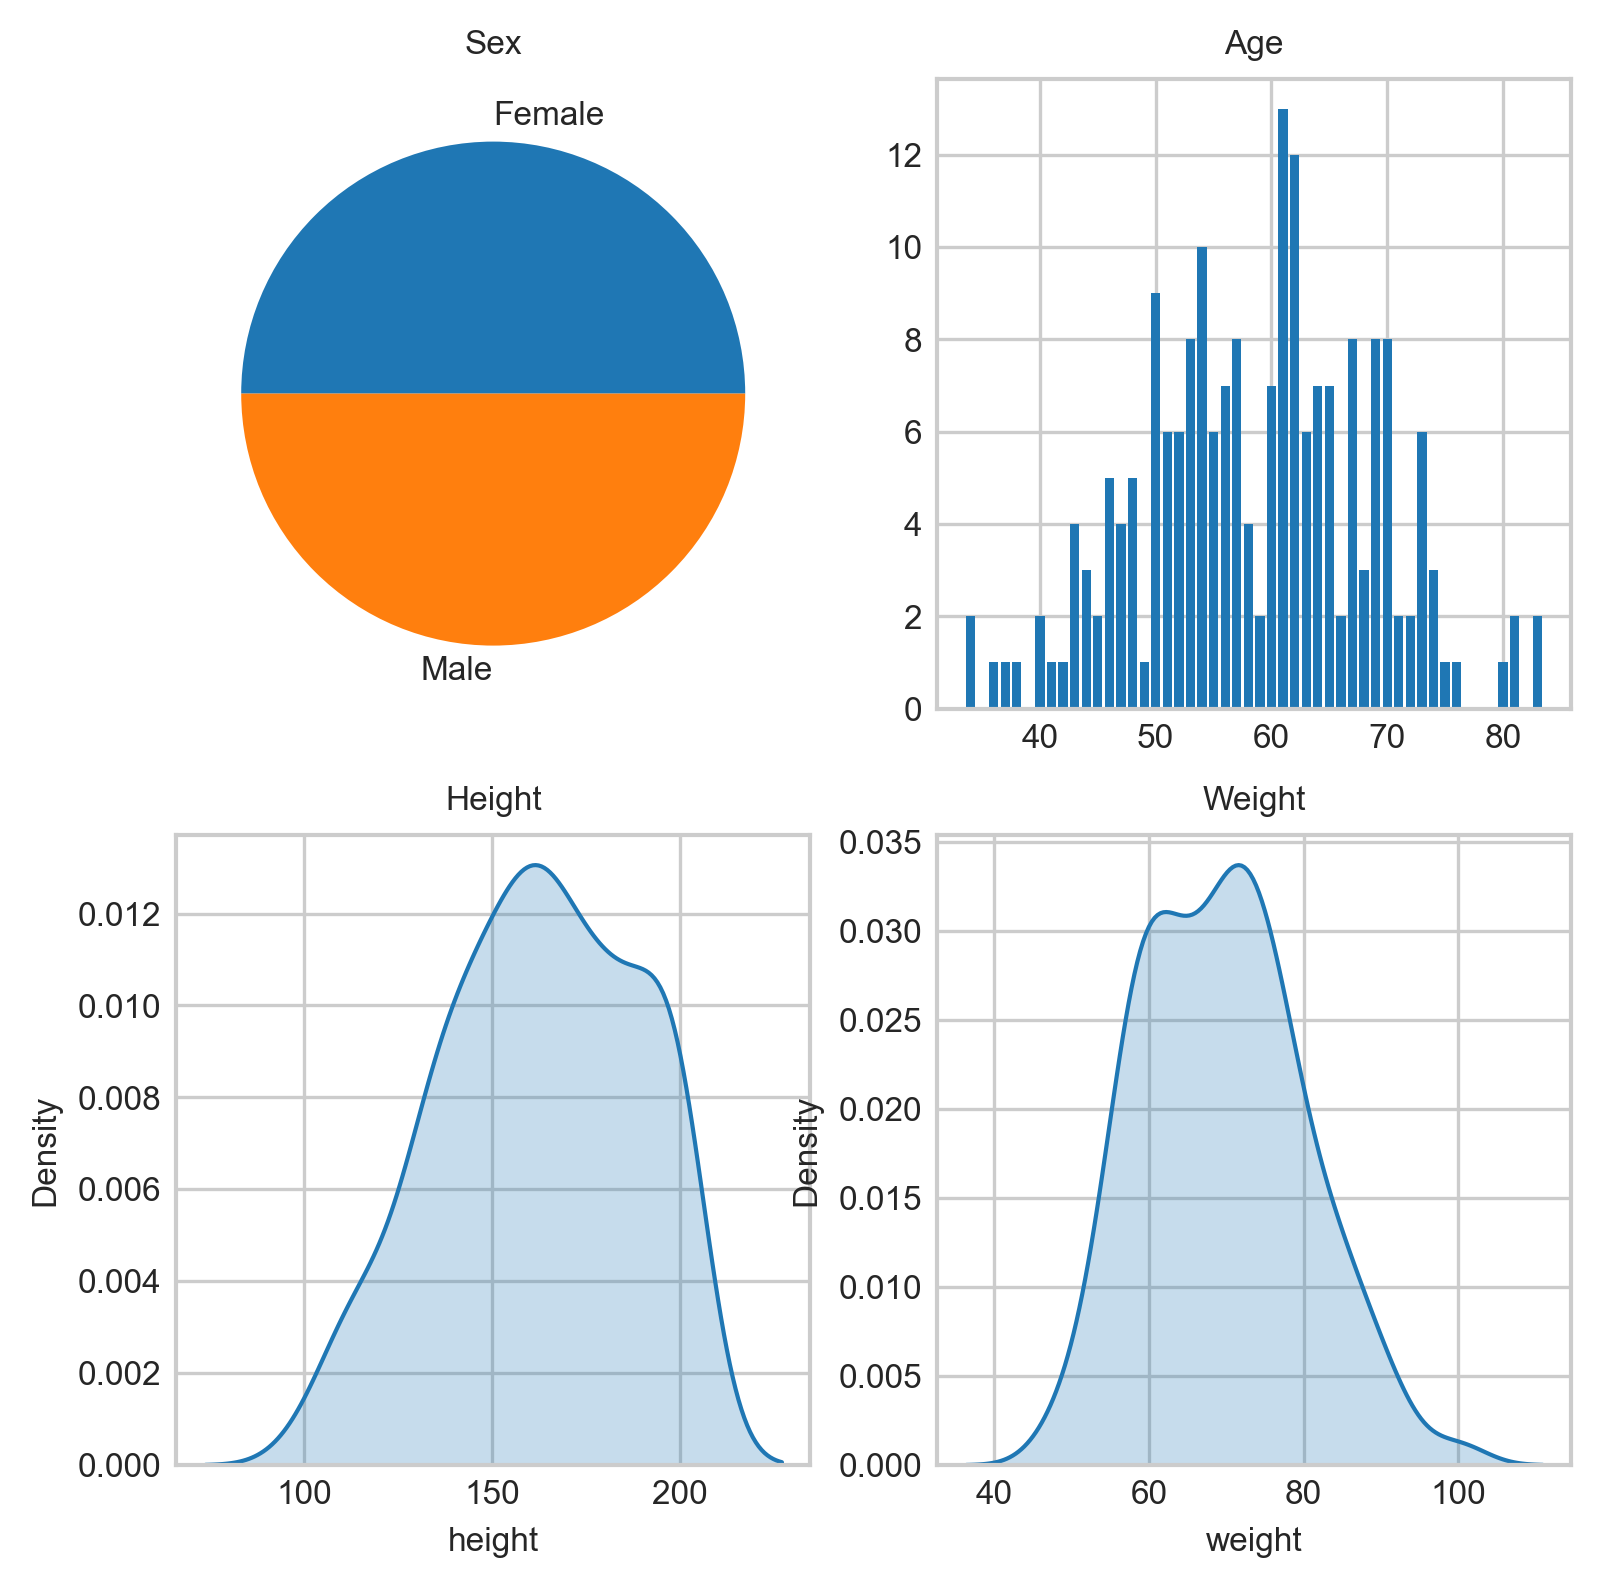

In [25]:
sex_count = people.groupby('sex').size()
fig, ax = plt.subplots(2,2,dpi=300,figsize=(6,6))
ax[0][0].set_title('Sex')
ax[0][0].pie(sex_count,labels=sex_count.index)
age_count = people.groupby('age').size()
ax[0][1].set_title('Age')
ax[0][1].bar(age_count.index,age_count)
ax[1][0].set_title('Height')
sns.kdeplot(people['height'],ax=ax[1][0],fill=True)
ax[1][1].set_title('Weight')
sns.kdeplot(people['weight'],ax=ax[1][1],fill=True)
plt.show()

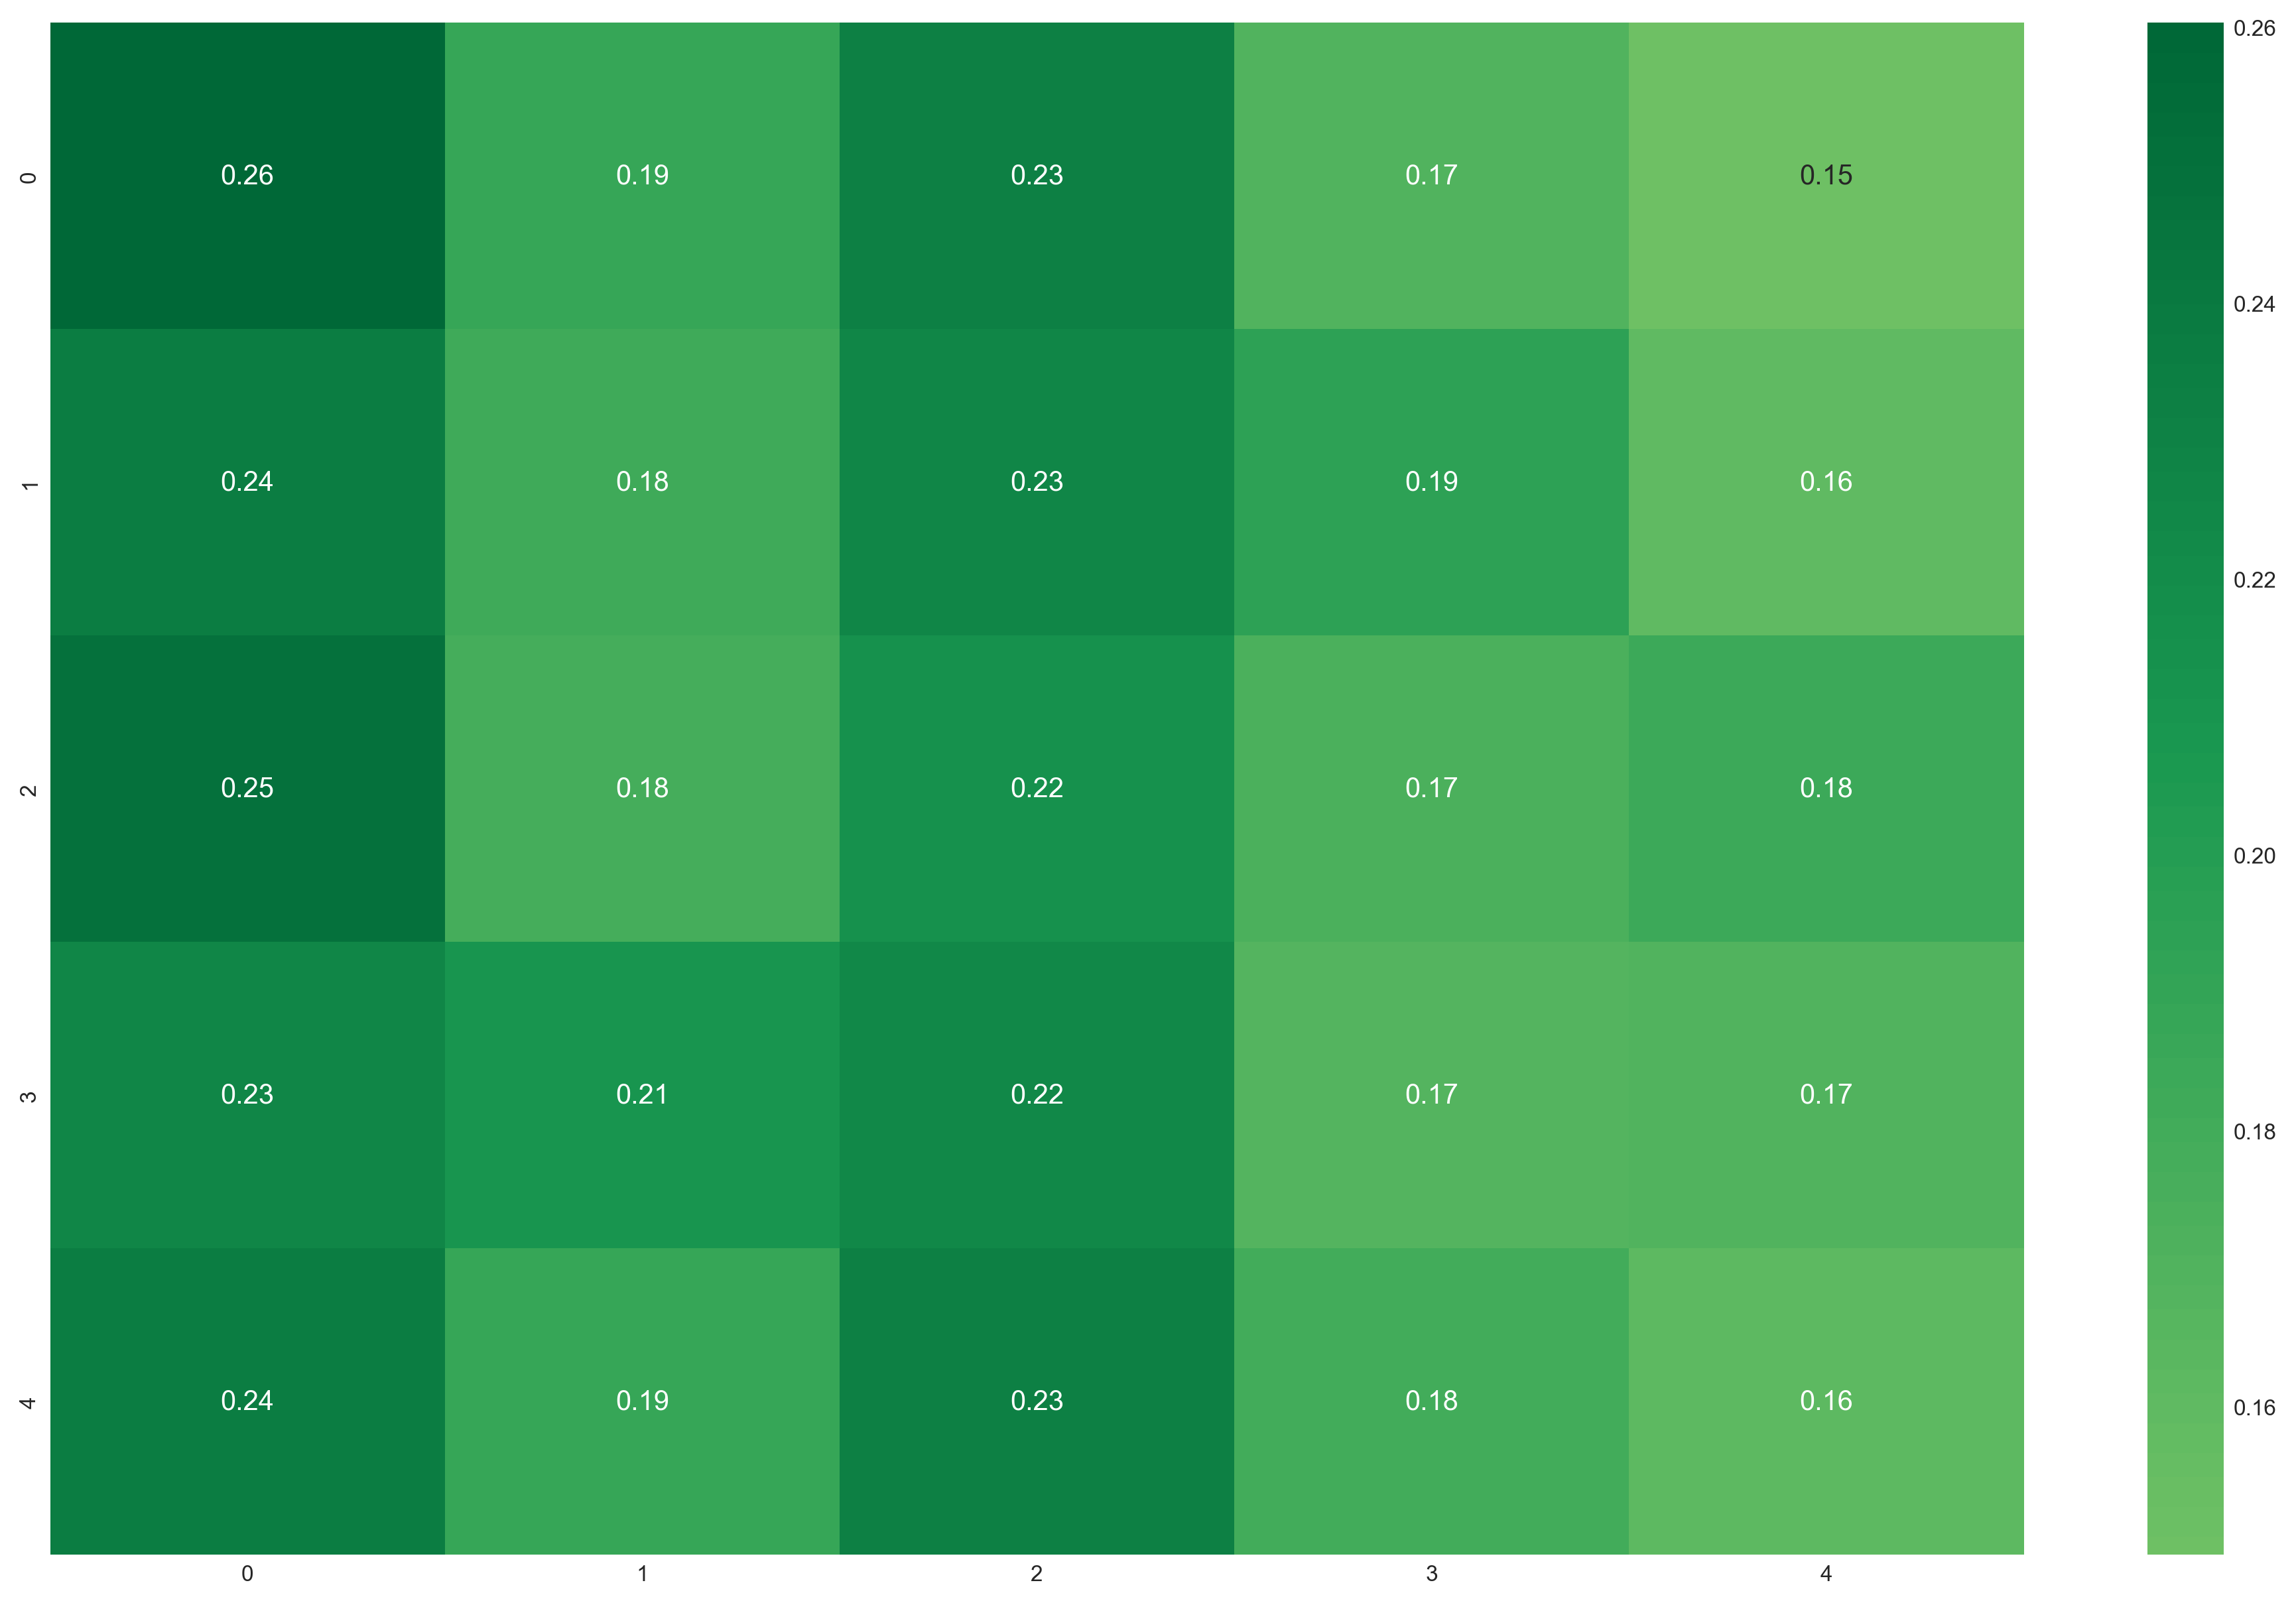

In [26]:
#3.
fig = plt.figure(dpi=300)
Q = np.random.rand(5, 10)
K = np.random.rand(5, 10)
attention = np.exp(np.dot(Q, K.T) / np.sqrt(10))
attention /= np.sum(attention, axis=1, keepdims=True)
sns.heatmap(attention,cmap='RdYlGn', center=0, annot=True)
plt.show()